In [1]:
from Class_PINN_FBPINN import *
import matplotlib.pyplot as plt

Running on  cpu


# Figure 1

### Plot a

In [2]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

w = 1
n_hidden_layers = 2
neurons = 16
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)

num_points = 200
n_epochs = 50000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_1st = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  5.183159146326943e-07 	 Training_time:  0  min  43  s


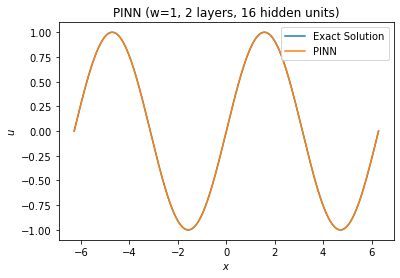

In [7]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)


torch.save(model.state_dict(), 'PINN_w1_2_16')

#Plot
fig = plt.figure(figsize=(6, 4))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'(a) PINN (w={model.w}, {model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.legend()
plt.savefig('pinn_fig1_1')

### Load Model

In [6]:
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)
model.load_state_dict(torch.load("PINN_w1_2_16"))
# model.eval()

PINN_Cos_1D(
  (activation_function): Tanh()
  (input_layer): Linear(in_features=1, out_features=16, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=16, out_features=16, bias=True)
  )
  (output_layer): Linear(in_features=16, out_features=1, bias=True)
)

### Plot b

In [10]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

w = 15
n_hidden_layers = 2
neurons = 16
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)

num_points = 200*15
n_epochs = 50000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_2nd = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  0.3392878770828247 	 Training_time:  0  min  36  s


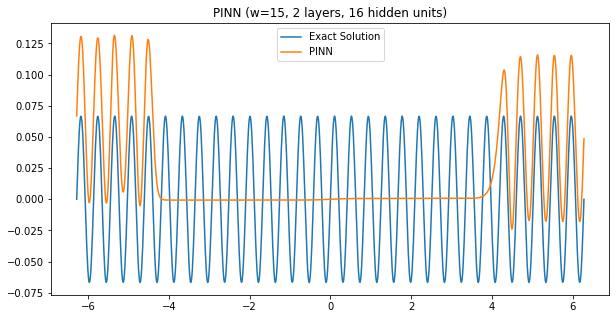

In [11]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)

torch.save(model.state_dict(), 'PINN_w15_2_16')

#Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'PINN (w={model.w}, {model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.legend()

### Plot c

In [12]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

w = 15
n_hidden_layers = 4
neurons = 64
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)

num_points = 200*15
n_epochs = 50000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_3rd = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  0.00523381819948554 	 Training_time:  6  min  3  s


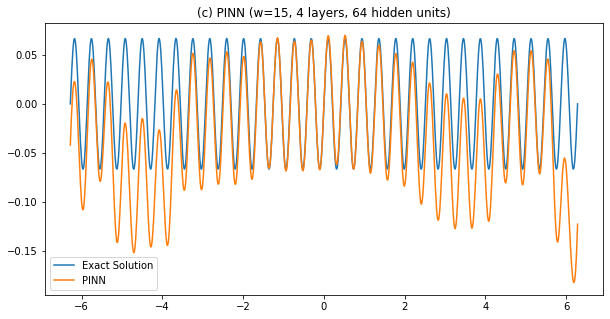

In [13]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)


torch.save(model.state_dict(), 'PINN_w15_4_64')

#Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'(c) PINN (w={model.w}, {model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.legend()

### Plot d

In [15]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

w = 15
n_hidden_layers = 5
neurons = 128
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)

num_points = 200*15
n_epochs = 50000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_4th = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  0.0009199802298098803 	 Training_time:  14  min  2  s


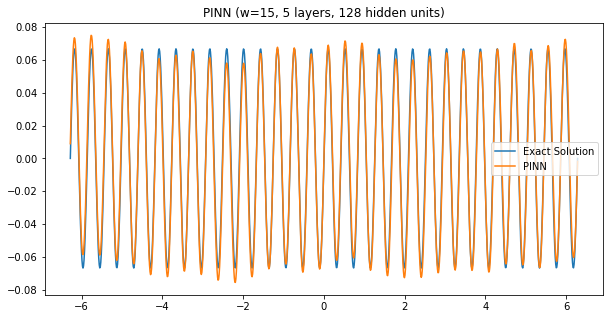

In [16]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)

#Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'PINN (w={model.w}, {model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.legend()

### Plot e

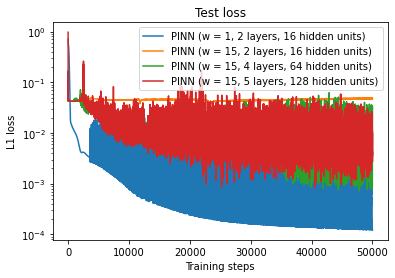

In [17]:
# Plot the L1 loss
fig = plt.figure(figsize=(6, 4))

l1_loss_arrray = [l1_loss_1st, l1_loss_2nd, l1_loss_3rd, l1_loss_4th]
labels_array = ['PINN (w = 1, 2 layers, 16 hidden units)',
                'PINN (w = 15, 2 layers, 16 hidden units)',
                'PINN (w = 15, 4 layers, 64 hidden units)',
                'PINN (w = 15, 5 layers, 128 hidden units)']

for i, l1_loss in enumerate(l1_loss_arrray):
    
    x = np.arange(0, len(l1_loss))
    y = np.array(l1_loss)

    plt.plot(x, y, label=labels_array[i])

plt.title('Test loss')
plt.xlabel('Training steps')
plt.ylabel('L1 loss')
plt.yscale('log')
plt.legend()
plt.savefig("l1_loss_fig1")

# Figure 5

In [11]:
# Parameters
domain = [-2*torch.pi, 2*torch.pi]
w = 1
n_subdomains = 5
overlap = 1.3
sigma = 0.1
n_hidden_layers = 2
neurons = 16

# Create the model
fbpinn = FBPPINN_Cos_1D(domain_extrema=domain, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), w=w)

# Train the FBPINN
num_points = 200
n_epochs = 10000

history, l1_loss_1st = fbpinn.fit(num_points, n_epochs, verbose=False)

Final loss:  0.00023688824148848653 	 Training_time:  0  min  37  s


### Plot a

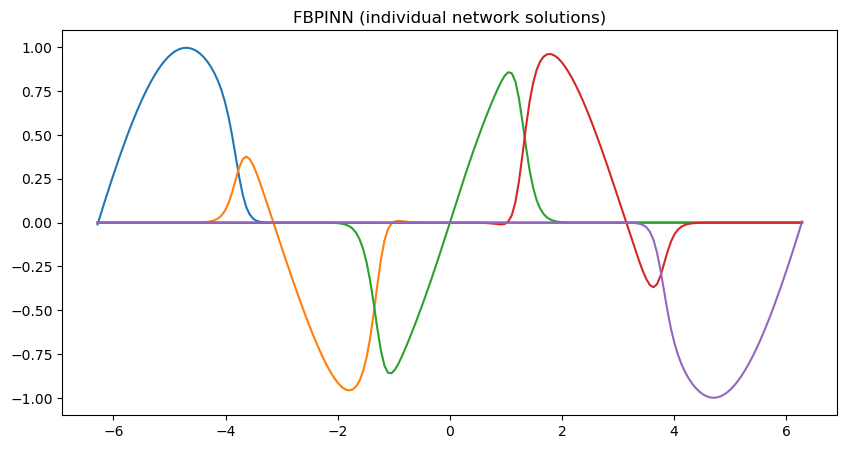

In [12]:
# PLOT ALL THE SUBNNs
fig = plt.figure(figsize=(10, 5))

x_test = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)

for i in range(fbpinn.n_subdomains):
    subdomain_i = fbpinn.subdomains[i]
    NN_i = fbpinn.neural_networks[i]
    NN_i.eval()

    x_test_norm = fbpinn.normalize_input(x_test)
    window_function = fbpinn.window_function(x_test, fbpinn.midpoints_overlap[i][0], fbpinn.midpoints_overlap[i][1])
    u_i =  window_function * fbpinn.unnormalize_output( NN_i( x_test_norm ) )
    
    u_approx_i = torch.tanh(fbpinn.w * x_test) * u_i


    plt.plot(x_test.cpu().detach().numpy(), u_approx_i.cpu().detach().numpy())
    plt.title('FBPINN (individual network solutions)')

### Plot b

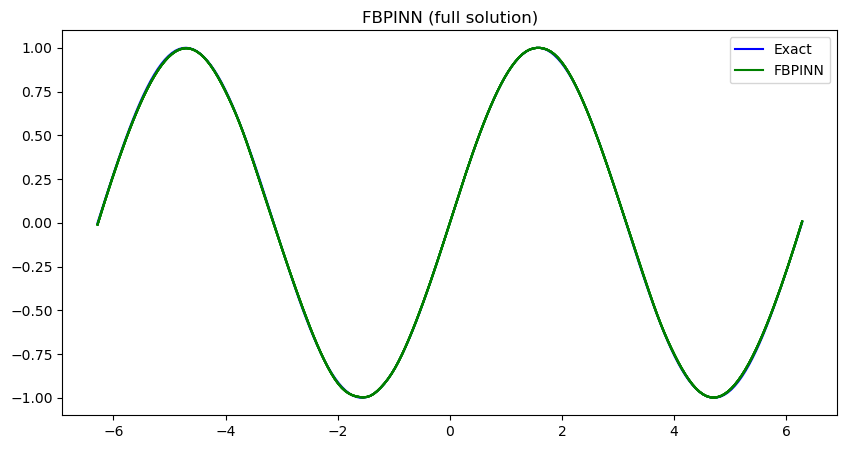

In [13]:
# PLOT THE FULL SOLUTION
fig = plt.figure(figsize=(10, 5))

# Plot the exact solution
x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)
u_exact = fbpinn.exact_solution(x)

plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")

# Plot the FBPINN solution
for i in range(fbpinn.n_subdomains):
    subdomain_i = fbpinn.subdomains[i]
    NN_i = fbpinn.neural_networks[i]
    NN_i.eval()
    
    u_approx = torch.tanh(fbpinn.w * x) * fbpinn(x)

    plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), color="green")
    # Add label only once
    if i == 0:
        plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")
plt.title('FBPINN (full solution)')
plt.legend()

### Plot c

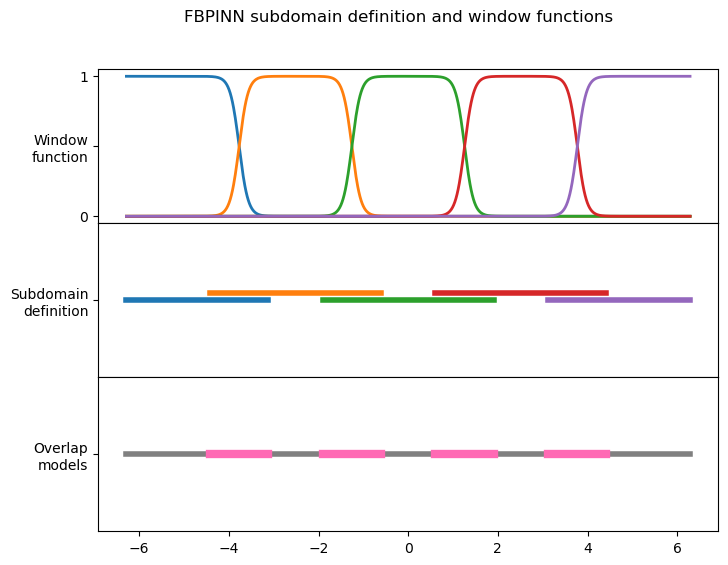

In [14]:
# PLOT THE WINDOW FUNCTIONS AND THE SUBDOMAINS
subdomains = fbpinn.subdomains
midpoints = fbpinn.midpoints_overlap

# Create a figure with three subplots in the same frame
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(8, 6))

# The window functions
window_fct = []
x = np.linspace(domain[0], domain[1], 1000)
for i in range(fbpinn.n_subdomains):
    window_fct.append(fbpinn.window_function(x, midpoints[i][0], midpoints[i][1]))

# fig = plt.figure(figsize=(10, 5))
for i in range(fbpinn.n_subdomains):
    ax1.plot(x, window_fct[i], linewidth=2)

# The subdomain
for i in range(fbpinn.n_subdomains):
    x = np.linspace(subdomains[i][0], subdomains[i][1], 100)
    y = np.full(100, i%2*0.01)
    ax2.plot(x, y, linewidth=4)
ax2.set_ylim([-0.1, 0.1])

# The overlap
x = np.linspace(domain[0], domain[1], 1000)
ax3.plot(x, np.full(1000, 0.5), linewidth=4, color="gray")
for i in range(1, fbpinn.n_subdomains):
    overlap_i = np.linspace(subdomains[i][0], subdomains[i-1][1], 100)
    ax3.plot(overlap_i, np.full(100, 0.5), linewidth=6, color="hotpink")




# Remove y-axis tick labels and ticks on the second and third subplot
ax1.set_yticks([0,0.5,1])
ax1.set_yticklabels([0, "Window\nfunction" ,1])

ax2.set_yticks([0])
ax2.set_yticklabels(["Subdomain\ndefinition"])

ax3.set_yticks([0.5])
ax3.set_yticklabels(["Overlap\nmodels"])

fig.suptitle('FBPINN subdomain definition and window functions')
plt.show()

### Plot d

In [15]:
# FBPINN WITH 0.2 OVERLAP
# Parameters
domain = [-2*torch.pi, 2*torch.pi]
w = 1
n_subdomains = 5
overlap = 0.2
sigma = 0.1
n_hidden_layers = 2
neurons = 16

# Create the model
fbpinn = FBPPINN_Cos_1D(domain_extrema=domain, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), w=w)

# Train the FBPINN
num_points = 200
n_epochs = 10000

history, l1_loss_2nd = fbpinn.fit(num_points, n_epochs, verbose=False)

Final loss:  0.00023688824148848653 	 Training_time:  0  min  40  s


In [16]:
# PINN
domain_extrema = [-2*torch.pi, 2*torch.pi]

w = 1
n_hidden_layers = 2
neurons = 16
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)

num_points = 200
n_epochs = 10000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_3rd = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  1.5239689673762769e-05 	 Training_time:  0  min  6  s


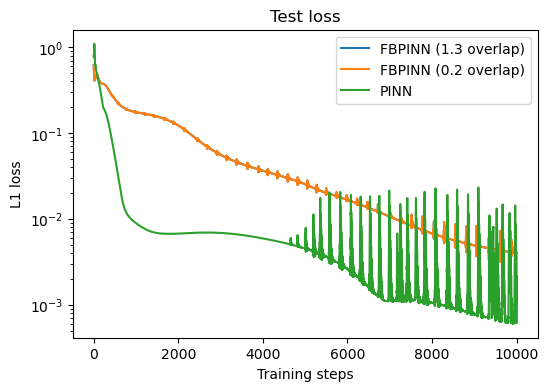

In [17]:
# Plot the L1 loss
fig = plt.figure(figsize=(6, 4))

l1_loss_arrray = [l1_loss_1st, l1_loss_2nd, l1_loss_3rd]
labels_array = ['FBPINN (1.3 overlap)',
                'FBPINN (0.2 overlap)',
                'PINN']

for i, l1_loss in enumerate(l1_loss_arrray):
    
    x = np.arange(0, len(l1_loss))
    y = np.array(l1_loss)

    plt.plot(x, y, label=labels_array[i])

plt.title('Test loss')
plt.xlabel('Training steps')
plt.ylabel('L1 loss')
plt.yscale('log')
plt.legend()

# Figure 6

In [18]:
# Parameters
domain = [-2*torch.pi, 2*torch.pi]
w = 15
n_subdomains = 30
overlap = 0.3
sigma = 0.05
n_hidden_layers = 2
neurons = 16

# Create the model
fbpinn = FBPPINN_Cos_1D(domain_extrema=domain, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), w=w)

# Train the FBPINN
num_points = 200
n_epochs = 10000

history, l1_loss_1st = fbpinn.fit(num_points, n_epochs, verbose=False)

Final loss:  0.00016602632240392268 	 Training_time:  3  min  50  s


### Plot a

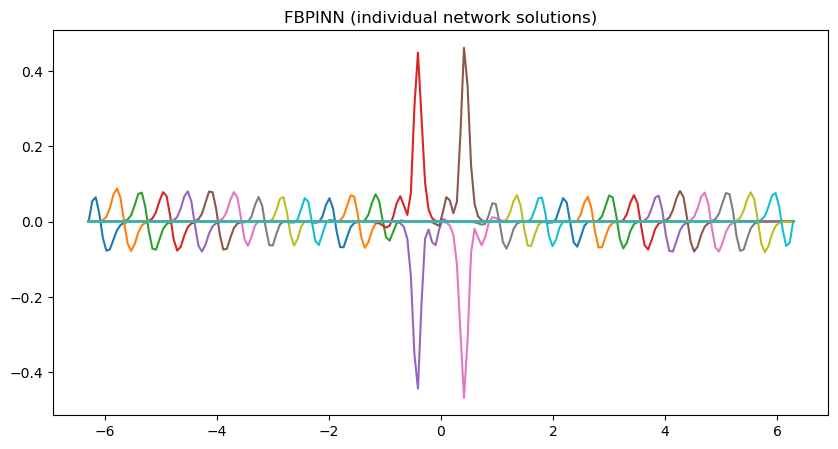

In [19]:
# PLOT ALL THE SUBNNs
fig = plt.figure(figsize=(10, 5))

x_test = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)

for i in range(fbpinn.n_subdomains):
    subdomain_i = fbpinn.subdomains[i]
    NN_i = fbpinn.neural_networks[i]
    NN_i.eval()

    x_test_norm = fbpinn.normalize_input(x_test)
    window_function = fbpinn.window_function(x_test, fbpinn.midpoints_overlap[i][0], fbpinn.midpoints_overlap[i][1])
    u_i =  window_function * fbpinn.unnormalize_output( NN_i( x_test_norm ) )
    
    u_approx_i = torch.tanh(fbpinn.w * x_test) * u_i


    plt.plot(x_test.cpu().detach().numpy(), u_approx_i.cpu().detach().numpy())
    plt.title('FBPINN (individual network solutions)')

### Plot b

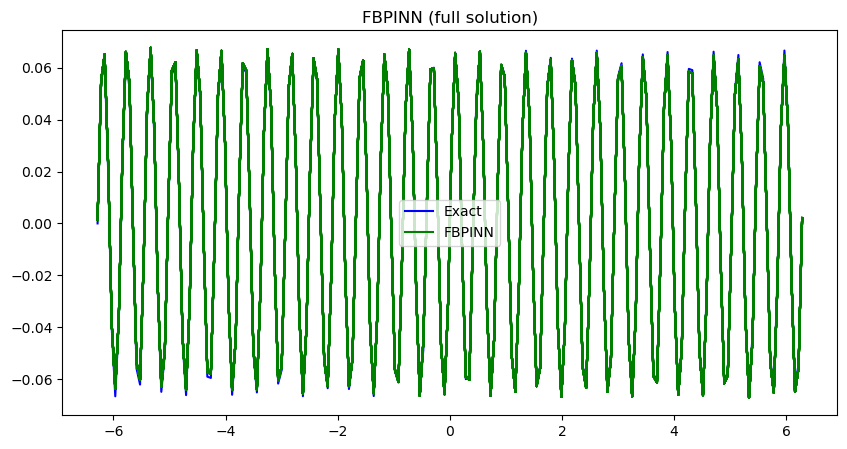

In [20]:
# PLOT THE FULL SOLUTION
fig = plt.figure(figsize=(10, 5))

# Plot the exact solution
x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)
u_exact = fbpinn.exact_solution(x)

plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")

# Plot the FBPINN solution
for i in range(fbpinn.n_subdomains):
    subdomain_i = fbpinn.subdomains[i]
    NN_i = fbpinn.neural_networks[i]
    NN_i.eval()
    
    u_approx = torch.tanh(fbpinn.w * x) * fbpinn(x)

    plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), color="green")
    # Add label only once
    if i == 0:
        plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")
plt.title('FBPINN (full solution)')
plt.legend()

### Plot c

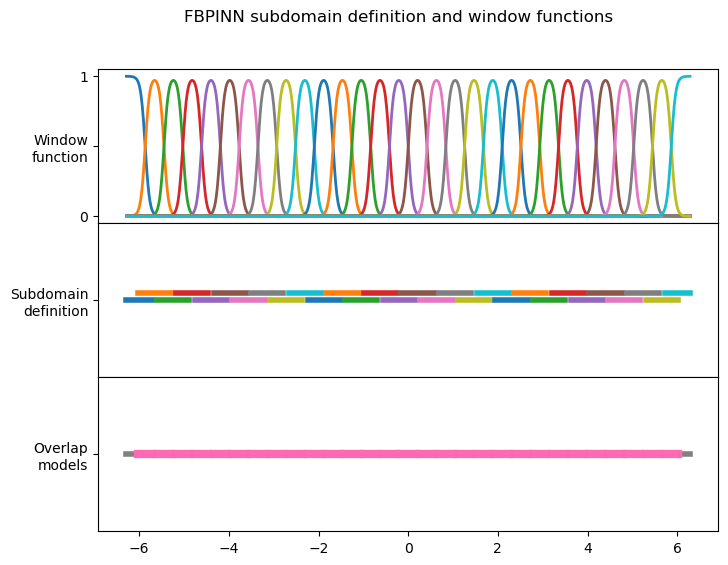

In [21]:
# PLOT THE WINDOW FUNCTIONS AND THE SUBDOMAINS
subdomains = fbpinn.subdomains
midpoints = fbpinn.midpoints_overlap

# Create a figure with three subplots in the same frame
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(8, 6))

# The window functions
window_fct = []
x = np.linspace(domain[0], domain[1], 1000)
for i in range(fbpinn.n_subdomains):
    window_fct.append(fbpinn.window_function(x, midpoints[i][0], midpoints[i][1]))

# fig = plt.figure(figsize=(10, 5))
for i in range(fbpinn.n_subdomains):
    ax1.plot(x, window_fct[i], linewidth=2)

# The subdomain
for i in range(fbpinn.n_subdomains):
    x = np.linspace(subdomains[i][0], subdomains[i][1], 100)
    y = np.full(100, i%2*0.01)
    ax2.plot(x, y, linewidth=4)
ax2.set_ylim([-0.1, 0.1])

# The overlap
x = np.linspace(domain[0], domain[1], 1000)
ax3.plot(x, np.full(1000, 0.5), linewidth=4, color="gray")
for i in range(1, fbpinn.n_subdomains):
    overlap_i = np.linspace(subdomains[i][0], subdomains[i-1][1], 100)
    ax3.plot(overlap_i, np.full(100, 0.5), linewidth=6, color="hotpink")




# Remove y-axis tick labels and ticks on the second and third subplot
ax1.set_yticks([0,0.5,1])
ax1.set_yticklabels([0, "Window\nfunction" ,1])

ax2.set_yticks([0])
ax2.set_yticklabels(["Subdomain\ndefinition"])

ax3.set_yticks([0.5])
ax3.set_yticklabels(["Overlap\nmodels"])

fig.suptitle('FBPINN subdomain definition and window functions')
plt.show()

### Plot d

In [22]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

w = 15
n_hidden_layers = 5
neurons = 128
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_1D(domain_extrema, n_hidden_layers, neurons, activation_function, w)

num_points = 200*15
n_epochs = 10000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_2nd = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  0.008677850477397442 	 Training_time:  2  min  33  s


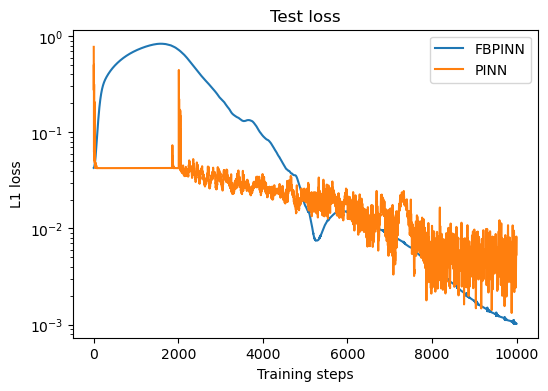

In [23]:
# Plot the L1 loss
fig = plt.figure(figsize=(6, 4))

l1_loss_arrray = [l1_loss_1st, l1_loss_2nd]
labels_array = ['FBPINN',
                'PINN']

for i, l1_loss in enumerate(l1_loss_arrray):
    
    x = np.arange(0, len(l1_loss))
    y = np.array(l1_loss)

    plt.plot(x, y, label=labels_array[i])

plt.title('Test loss')
plt.xlabel('Training steps')
plt.ylabel('L1 loss')
plt.yscale('log')
plt.legend()

# Figure 7

In [24]:
# Parameters
domain = [-2*torch.pi, 2*torch.pi]

n_multi_scale = 2
w_list = [1, 15]
n_subdomains = 30
overlap = 0.3
sigma = 0.1
n_hidden_layers = 2
neurons = 16

# Create the model
fbpinn = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

# Train the FBPINN
num_points = 200
n_epochs = 10000

history, l1_loss_1st = fbpinn.fit(num_points, n_epochs, verbose=False)

Final loss:  0.05278151482343674 	 Training_time:  3  min  53  s


### Plot a

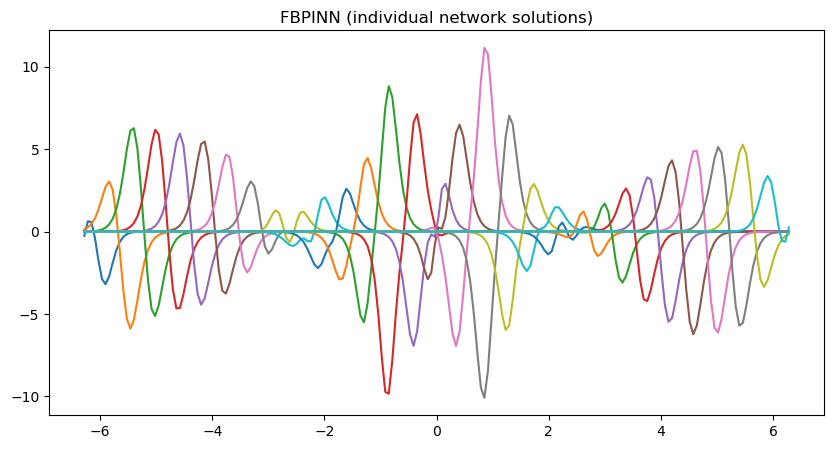

In [25]:
# PLOT ALL THE SUBNNs
fig = plt.figure(figsize=(10, 5))

x_test = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)

for i in range(fbpinn.n_subdomains):
    subdomain_i = fbpinn.subdomains[i]
    NN_i = fbpinn.neural_networks[i]
    NN_i.eval()

    x_test_norm = fbpinn.normalize_input(x_test)
    window_function = fbpinn.window_function(x_test, fbpinn.midpoints_overlap[i][0], fbpinn.midpoints_overlap[i][1])
    u_i =  window_function * fbpinn.unnormalize_output( NN_i( x_test_norm ) )
    
    u_approx_i = torch.tanh(fbpinn.w_list[1] * x_test) * u_i


    plt.plot(x_test.cpu().detach().numpy(), u_approx_i.cpu().detach().numpy())
    plt.title('FBPINN (individual network solutions)')

### Plot b

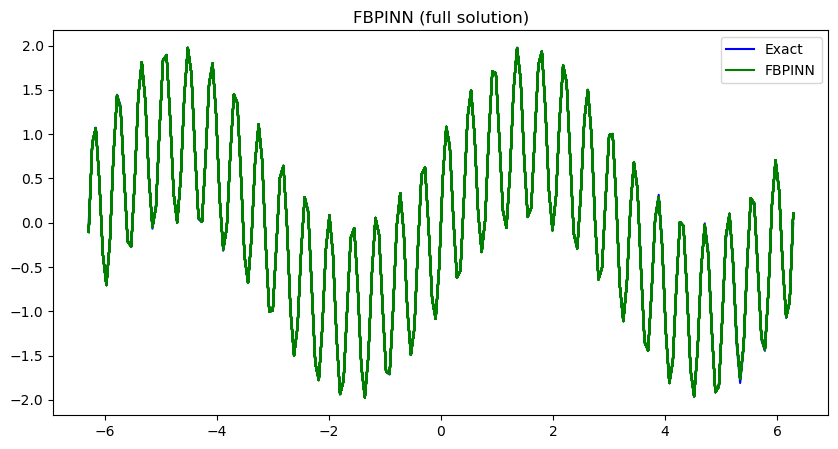

In [26]:
# PLOT THE FULL SOLUTION
fig = plt.figure(figsize=(10, 5))

# Plot the exact solution
x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)
u_exact = fbpinn.exact_solution(x)

plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")

# Plot the FBPINN solution
for i in range(fbpinn.n_subdomains):
    subdomain_i = fbpinn.subdomains[i]
    NN_i = fbpinn.neural_networks[i]
    NN_i.eval()
    
    u_approx = torch.tanh(fbpinn.w_list[1] * x) * fbpinn(x)

    plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), color="green")
    # Add label only once
    if i == 0:
        plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")
plt.title('FBPINN (full solution)')
plt.legend()

### Plot c

In [27]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

n_multi_scale = 2
w_list = [1, 15]
n_hidden_layers = 2
neurons = 16
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_nD(domain_extrema, n_hidden_layers, neurons, activation_function, n_multi_scale, w_list)

num_points = 200
n_epochs = 10000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_2nd = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  87.27472686767578 	 Training_time:  0  min  6  s


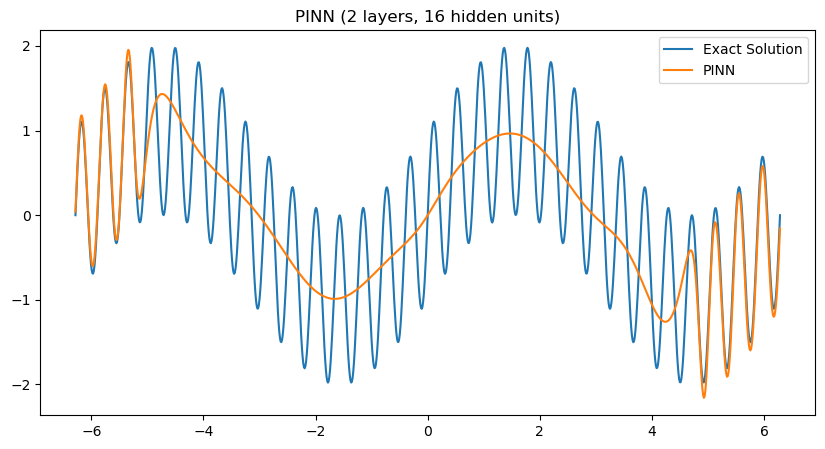

In [28]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w_list[1] * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)

#Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'PINN ({model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.legend()

### Plot d

In [29]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

n_multi_scale = 2
w_list = [1, 15]
n_hidden_layers = 4
neurons = 64
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_nD(domain_extrema, n_hidden_layers, neurons, activation_function, n_multi_scale, w_list)

num_points = 200*15
n_epochs = 10000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_3rd = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  22.557146072387695 	 Training_time:  1  min  4  s


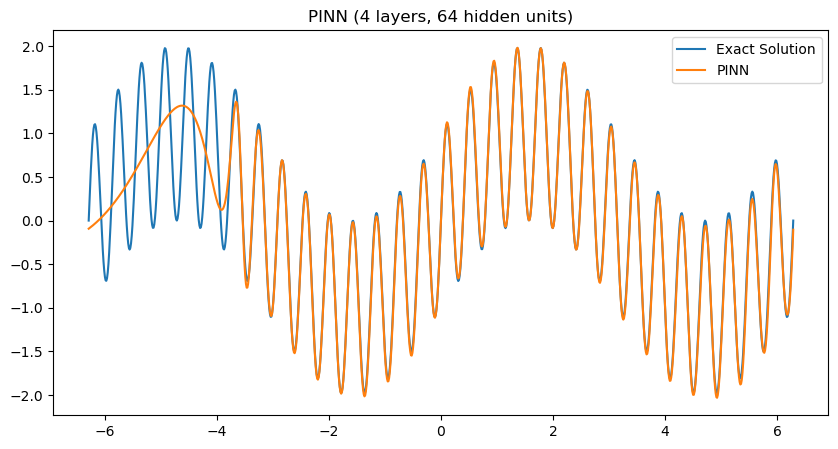

In [30]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w_list[1] * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)

#Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'PINN ({model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.legend()

### Plot e

In [31]:
domain_extrema = [-2*torch.pi, 2*torch.pi]

n_multi_scale = 2
w_list = [1, 15]
n_hidden_layers = 5
neurons = 128
activation_function = nn.Tanh()

# Create the model
model = PINN_Cos_nD(domain_extrema, n_hidden_layers, neurons, activation_function, n_multi_scale, w_list)

num_points = 200*15
n_epochs = 10000

optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))

history, l1_loss_4th = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Final loss:  1.7046459913253784 	 Training_time:  2  min  29  s


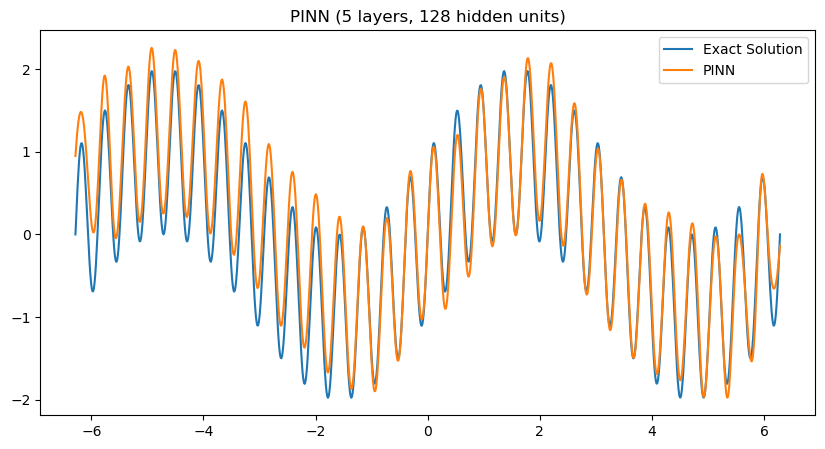

In [32]:
# MAKE THE PLOT
model.eval()

# test points
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

# Evaluate the exact solution
u_exact = model.exact_solution(x)

# Evaluate the approximate solution
u_approx = torch.tanh(model.w_list[1] * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

# Resale the approximate solution to the same scale as the exact solution
u_approx = model.restore_output(u_approx)

#Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
plt.title(f'PINN ({model.n_hidden_layers} layers, {model.neurons[0]} hidden units)')
plt.legend()

### Plot f

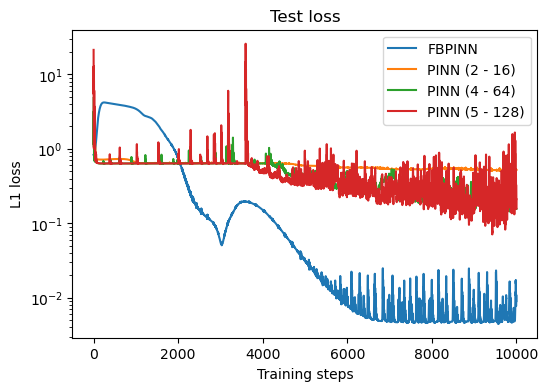

In [33]:
# Plot the L1 loss
fig = plt.figure(figsize=(6, 4))

l1_loss_arrray = [l1_loss_1st, l1_loss_2nd, l1_loss_3rd, l1_loss_4th]
labels_array = ['FBPINN',
                'PINN (2 - 16)',
                'PINN (4 - 64)',
                'PINN (5 - 128)'
                ]

for i, l1_loss in enumerate(l1_loss_arrray):
    
    x = np.arange(0, len(l1_loss))
    y = np.array(l1_loss)

    plt.plot(x, y, label=labels_array[i])

plt.title('Test loss')
plt.xlabel('Training steps')
plt.ylabel('L1 loss')
plt.yscale('log')
plt.legend()

### Plot extra

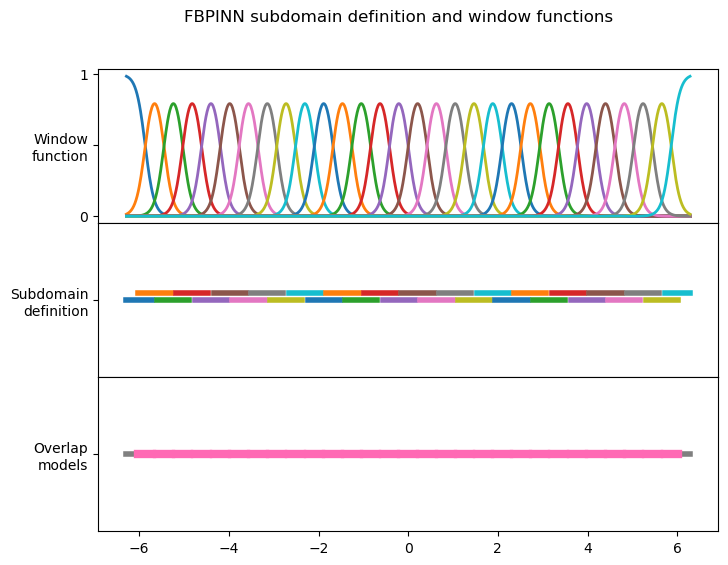

In [34]:
# PLOT THE WINDOW FUNCTIONS AND THE SUBDOMAINS
subdomains = fbpinn.subdomains
midpoints = fbpinn.midpoints_overlap

# Create a figure with three subplots in the same frame
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(8, 6))

# The window functions
window_fct = []
x = np.linspace(domain[0], domain[1], 1000)
for i in range(fbpinn.n_subdomains):
    window_fct.append(fbpinn.window_function(x, midpoints[i][0], midpoints[i][1]))

# fig = plt.figure(figsize=(10, 5))
for i in range(fbpinn.n_subdomains):
    ax1.plot(x, window_fct[i], linewidth=2)

# The subdomain
for i in range(fbpinn.n_subdomains):
    x = np.linspace(subdomains[i][0], subdomains[i][1], 100)
    y = np.full(100, i%2*0.01)
    ax2.plot(x, y, linewidth=4)
ax2.set_ylim([-0.1, 0.1])

# The overlap
x = np.linspace(domain[0], domain[1], 1000)
ax3.plot(x, np.full(1000, 0.5), linewidth=4, color="gray")
for i in range(1, fbpinn.n_subdomains):
    overlap_i = np.linspace(subdomains[i][0], subdomains[i-1][1], 100)
    ax3.plot(overlap_i, np.full(100, 0.5), linewidth=6, color="hotpink")




# Remove y-axis tick labels and ticks on the second and third subplot
ax1.set_yticks([0,0.5,1])
ax1.set_yticklabels([0, "Window\nfunction" ,1])

ax2.set_yticks([0])
ax2.set_yticklabels(["Subdomain\ndefinition"])

ax3.set_yticks([0.5])
ax3.set_yticklabels(["Overlap\nmodels"])

fig.suptitle('FBPINN subdomain definition and window functions')
plt.show()